In [223]:
from lib.data import Mimic2
import numpy as np
from lib.model import LR
from lib.train import Trainer, prepareData
from torch.utils.data import Dataset, DataLoader, TensorDataset
from lib.regularization import eye_loss
from sklearn.metrics import accuracy_score
import torch
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

In [85]:
m = Mimic2()

In [60]:
m.x

,ALP_max,ALP_mean,ALP_min,ALT_max,ALT_mean,ALT_min,AST_max,AST_mean,AST_min,Age,...,HR_worst,K_worst,MechVent_worst,NISysABP_worst,Na_worst,RespRate_worst,SysABP_worst,Temp_worst,Urine_worst,WBC_worst
0,144.39441,132.236041,120.13354,349.344512,261.105473,167.039634,672.781155,456.328030,268.823708,54.0,...,58.000000,4.400000,12.0,157.000000,137.0,12.000000,115.134094,35.100000,2470.000000,11.2
1,144.39441,132.236041,120.13354,349.344512,261.105473,167.039634,672.781155,456.328030,268.823708,76.0,...,80.000000,4.300000,49.0,122.469331,139.0,21.725615,66.000000,34.500000,3474.000000,7.4
2,127.00000,116.000000,105.00000,91.000000,83.000000,75.000000,235.000000,199.500000,164.000000,44.0,...,57.000000,8.600000,49.0,150.000000,137.0,21.725615,115.134094,39.000000,2910.000000,3.7
3,105.00000,105.000000,105.00000,12.000000,12.000000,12.000000,15.000000,15.000000,15.000000,68.0,...,57.000000,4.000000,12.0,102.000000,140.0,12.000000,115.134094,35.100000,1400.000000,8.8
4,144.39441,132.236041,120.13354,349.344512,261.105473,167.039634,672.781155,456.328030,268.823708,88.0,...,67.000000,6.000000,12.0,156.000000,140.0,26.000000,115.134094,35.800000,1196.000000,3.8
5,101.00000,101.000000,101.00000,60.000000,52.500000,45.000000,162.000000,104.500000,47.000000,64.0,...,71.000000,3.800000,49.0,73.000000,137.0,21.725615,115.134094,35.800000,2850.000000,24.0
6,144.39441,132.236041,120.13354,349.344512,261.105473,167.039634,672.781155,456.328030,268.823708,68.0,...,50.000000,3.400000,12.0,218.000000,139.0,11.000000,115.134094,35.800000,1366.000000,6.2
7,47.00000,47.000000,47.00000,46.000000,46.000000,46.000000,82.000000,82.000000,82.000000,78.0,...,62.000000,3.900000,49.0,122.469331,141.0,21.725615,76.000000,35.600000,973.000000,20.4
8,144.39441,132.236041,120.13354,349.344512,261.105473,167.039634,672.781155,456.328030,268.823708,64.0,...,120.000000,3.900000,12.0,106.000000,139.0,44.000000,115.134094,36.800000,700.000000,15.2
9,144.39441,132.236041,120.13354,349.344512,261.105473,167.039634,672.781155,456.328030,268.823708,74.0,...,67.000000,4.600000,49.0,122.469331,141.0,21.725615,78.000000,34.800000,2610.000000,9.0


In [61]:
x, y = m[1:10]
x, y

(        ALP_max    ALP_mean    ALP_min     ALT_max    ALT_mean     ALT_min  \
 2356  144.39441  132.236041  120.13354  349.344512  261.105473  167.039634   
 3257   49.00000   44.333333   41.00000   52.000000   42.333333   24.000000   
 3667  144.39441  132.236041  120.13354  349.344512  261.105473  167.039634   
 2586  144.39441  132.236041  120.13354  349.344512  261.105473  167.039634   
 1916  144.39441  132.236041  120.13354  349.344512  261.105473  167.039634   
 366   144.39441  132.236041  120.13354  349.344512  261.105473  167.039634   
 2669  144.39441  132.236041  120.13354  349.344512  261.105473  167.039634   
 767   144.39441  132.236041  120.13354  349.344512  261.105473  167.039634   
 2248   76.00000   76.000000   76.00000   19.000000   19.000000   19.000000   
 
          AST_max    AST_mean     AST_min   Age    ...      HR_worst  K_worst  \
 2356  672.781155  456.328030  268.823708  67.0    ...          88.0      3.9   
 3257   88.000000   63.666667   32.000000  38.

In [162]:
n, d = 1000, 2                                                                                                                                                                     

def gendata():                                                                                                                                                                     
    x = np.random.randn(n, d)                                                                                                                                                      
    y = (x.sum(1) > 0).astype(np.int)                                                                                                                                              
    return x, y                                                                                                                                                                    

xtr, ytr = gendata()                                                                                                                                                               
xte, yte = gendata()                                                                                                                                                               

r = Variable(torch.FloatTensor([0, 1]))
train_data = TensorDataset(*map(lambda x: x.data, prepareData(xtr, ytr)))
data = DataLoader(train_data, batch_size=100, shuffle=True)

n_output = 2 # binary classification task                                                                                                                                          
model = LR(d, n_output)                                                                                                                                                            
learning_rate = 0.01                                                                                                                                                               

t = Trainer(model, lr=learning_rate, risk_factors=r, alpha=0.1,
            regularization=eye_loss, reg_parameters=model.i2o.weight)  
t.fit(data, n_epochs=60, print_every=50)                                                                                                                                                       

def model_acc(model, x, y):                                                                                                                                                        
    x, _ = prepareData(x, y)                                                                                                                                                       
    yhat = np.argmax(model(x).data.numpy(), 1)                                                                                                                                     
    return accuracy_score(y, yhat)                                                                                                                                                 

print(model_acc(model, xte, yte)) 

0.17% (0m 0s) 0.0133
1.83% (0m 0s) 0.0116
3.50% (0m 0s) 0.0096
5.17% (0m 0s) 0.0079
6.83% (0m 0s) 0.0076
8.50% (0m 0s) 0.0067
10.17% (0m 0s) 0.0061
11.83% (0m 0s) 0.0059
13.50% (0m 0s) 0.0057
15.17% (0m 0s) 0.0058
16.83% (0m 0s) 0.0054
18.50% (0m 0s) 0.0058
20.17% (0m 1s) 0.0057
21.83% (0m 1s) 0.0057
23.50% (0m 1s) 0.0057
25.17% (0m 1s) 0.0056
26.83% (0m 1s) 0.0056
28.50% (0m 1s) 0.0058
30.17% (0m 1s) 0.0057
31.83% (0m 1s) 0.0052
33.50% (0m 1s) 0.0057
35.17% (0m 1s) 0.0057
36.83% (0m 1s) 0.0058
38.50% (0m 1s) 0.0056
40.17% (0m 1s) 0.0054
41.83% (0m 1s) 0.0056
43.50% (0m 1s) 0.0054
45.17% (0m 2s) 0.0053
46.83% (0m 2s) 0.0056
48.50% (0m 2s) 0.0054
50.17% (0m 2s) 0.0057
51.83% (0m 2s) 0.0055
53.50% (0m 2s) 0.0054
55.17% (0m 2s) 0.0053
56.83% (0m 2s) 0.0055
58.50% (0m 2s) 0.0055
60.17% (0m 2s) 0.0057
61.83% (0m 2s) 0.0057
63.50% (0m 2s) 0.0058
65.17% (0m 2s) 0.0058
66.83% (0m 2s) 0.0059
68.50% (0m 3s) 0.0055
70.17% (0m 3s) 0.0059
71.83% (0m 3s) 0.0054
73.50% (0m 3s) 0.0054
75.17% (0m 3s) 0

# using real data

In [248]:
r = Variable(torch.FloatTensor(list(map(lambda name: 1 if 'worst' in name else 0, m.x.columns))))

d = r.size(0)
train_data = TensorDataset(*map(lambda x: x.data, prepareData(m.xtrain.as_matrix(), m.ytrain.as_matrix())))
data = DataLoader(train_data, batch_size=4000, shuffle=True)

valdata = TensorDataset(*map(lambda x: x.data, prepareData(m.xval.as_matrix(), m.yval.as_matrix())))
valdata = DataLoader(valdata, batch_size=4000, shuffle=True)

n_output = 2 # binary classification task                                                                                                                                          
model = LR(d, n_output)                                                                                                                                                            
learning_rate = 0.001                                                                                                                                                               

t = Trainer(model, lr=learning_rate, risk_factors=r, alpha=0.00,
            regularization=eye_loss, reg_parameters=model.i2o.weight)  
losses, vallosses = t.fit(data, n_epochs=1000, print_every=1, valdata=valdata)                                                                                                                                                       

def model_acc(model, x, y):                                                                                                                                                        
    x, _ = prepareData(x, y)                                                                                                                                                       
    yhat = np.argmax(model(x).data.numpy(), 1)                                                                                                                                     
    return accuracy_score(y, yhat)                                                                                                                                                 

print('train acc', model_acc(model, m.xtrain.as_matrix(), m.ytrain.as_matrix())) 
print('val acc', model_acc(model, m.xval.as_matrix(), m.yval.as_matrix())) 

1.00% (0m 0s) 0.0159 0.50120.5030
2.00% (0m 0s) 0.0149 0.50150.5019
3.00% (0m 0s) 0.0139 0.50650.4984
4.00% (0m 0s) 0.0130 0.51500.4991
5.00% (0m 1s) 0.0121 0.52220.5155
6.00% (0m 1s) 0.0113 0.53740.5398
7.00% (0m 1s) 0.0105 0.54460.5516
8.00% (0m 1s) 0.0099 0.54810.5665
9.00% (0m 1s) 0.0093 0.56030.5717
10.00% (0m 2s) 0.0089 0.57090.5913
11.00% (0m 2s) 0.0087 0.57900.6071
12.00% (0m 2s) 0.0087 0.58190.6395
13.00% (0m 2s) 0.0087 0.59800.6340
14.00% (0m 2s) 0.0088 0.60160.6415
15.00% (0m 2s) 0.0088 0.60200.6447
16.00% (0m 3s) 0.0087 0.60360.6539
17.00% (0m 3s) 0.0086 0.60180.6472
18.00% (0m 3s) 0.0084 0.59830.6470
19.00% (0m 3s) 0.0082 0.59990.6408
20.00% (0m 3s) 0.0079 0.59110.6388
21.00% (0m 3s) 0.0077 0.59100.6192
22.00% (0m 4s) 0.0074 0.58500.6031
23.00% (0m 4s) 0.0072 0.57890.5949
24.00% (0m 4s) 0.0070 0.57480.5933
25.00% (0m 4s) 0.0069 0.56520.5781
26.00% (0m 4s) 0.0068 0.56300.5749
27.00% (0m 4s) 0.0067 0.56080.5784
28.00% (0m 5s) 0.0066 0.55960.5807
29.00% (0m 5s) 0.0066 0.56010

In [217]:
print(m.ytrain.sum() / m.ytrain.shape[0])
print(m.yval.sum() / m.yval.shape[0])

0.138666666667
0.138


In [203]:
m.xtrain.shape
m.yval.shape

(1000,)

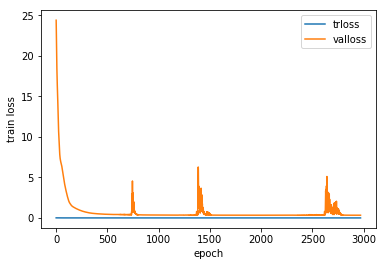

In [260]:
import matplotlib.pyplot as plt
begin = 30
end = 3000
plt.plot(losses[begin:end], label='trloss')
plt.plot(vallosses[begin:end], label='valloss')
plt.legend()

plt.ylabel('train loss')
plt.xlabel('epoch')
plt.show()